In [1]:
import nltk as nltk
import numpy as np

## Import tags of verses as a table

In [2]:
import os
import pandas as pd


df_tags = pd.DataFrame()
list_ = []

dir = './rijmdata/tagbase'
for filename in os.listdir(dir):
    filepath = dir+'/'+filename
    
    # check if not an empty tag file
    with open (filepath, "r") as myfile:
        data=myfile.readlines()
        if len(data)<=1:
            print("skipping ", filepath)
            continue
    
    print("importing ",filepath )    
    df = pd.read_csv(filepath, sep=',', skiprows=1, header=None, dtype=str)
    list_.append(df)
df_tags = pd.concat(list_)
df_tags.columns = ['tag','verse_id']
df_tags['tag'] = df_tags['tag'].astype('str') 

importing  ./rijmdata/tagbase/tags1.cat
importing  ./rijmdata/tagbase/tags10.cat
importing  ./rijmdata/tagbase/tags11.cat
importing  ./rijmdata/tagbase/tags12.cat
importing  ./rijmdata/tagbase/tags13.cat
importing  ./rijmdata/tagbase/tags14.cat
importing  ./rijmdata/tagbase/tags15.cat
importing  ./rijmdata/tagbase/tags16.cat
importing  ./rijmdata/tagbase/tags17.cat
importing  ./rijmdata/tagbase/tags18.cat
importing  ./rijmdata/tagbase/tags19.cat
importing  ./rijmdata/tagbase/tags2.cat
importing  ./rijmdata/tagbase/tags20.cat
importing  ./rijmdata/tagbase/tags21.cat
importing  ./rijmdata/tagbase/tags22.cat
importing  ./rijmdata/tagbase/tags23.cat
skipping  ./rijmdata/tagbase/tags24.cat
skipping  ./rijmdata/tagbase/tags25.cat
importing  ./rijmdata/tagbase/tags26.cat
skipping  ./rijmdata/tagbase/tags27.cat
skipping  ./rijmdata/tagbase/tags28.cat
skipping  ./rijmdata/tagbase/tags29.cat
importing  ./rijmdata/tagbase/tags3.cat
skipping  ./rijmdata/tagbase/tags30.cat
skipping  ./rijmdata/tagb

In [3]:
df_tags[df_tags['verse_id']=='002']

,tag,verse_id
8,Kado,002
6,machtig,002
43,mooi,002
84,prachtig,002
0,Cadeau,002


## Import the verses

In [4]:
import re

def remove_html(input):
    "very simple version"
    tagreg = re.compile(r'(<!--.*?-->|<[^>]*>)')
    no_html = tagreg.sub(' ', input)
    return no_html


df_verses = pd.DataFrame()
list_ = []

dir = './rijmdata/versebase'
for filename in os.listdir(dir):
    filepath = dir+'/'+filename
    
    print("importing verses from ",filepath )
    
    with open (filepath, "r") as myfile:
        data=myfile.readlines()
    
    # first two lines is header, then each line is a verse
    for i in range(2,len(data)):
        # first number (until first comma) is it's verse_id
        line = data[i]
        id, title, verse = line.split(',',2)     
        list_.append([id, title, remove_html(verse)])
        
df_verses = pd.DataFrame(list_, columns=['verse_id','title','verse'])
df_verses['verse_id'] = df_verses['verse_id'].astype('str')
#df_verses.set_index('verse_id', inplace=True)

importing verses from  ./rijmdata/versebase/verses27.cat
importing verses from  ./rijmdata/versebase/verses28.cat
importing verses from  ./rijmdata/versebase/verses29.cat
importing verses from  ./rijmdata/versebase/verses30.cat
importing verses from  ./rijmdata/versebase/verses31.cat
importing verses from  ./rijmdata/versebase/verses32.cat
importing verses from  ./rijmdata/versebase/verses33.cat
importing verses from  ./rijmdata/versebase/verses34.cat
importing verses from  ./rijmdata/versebase/verses35.cat
importing verses from  ./rijmdata/versebase/verses36.cat
importing verses from  ./rijmdata/versebase/verses37.cat


In [5]:
df_verses.head(10)

,verse_id,title,verse
0,001,te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z..."
1,002,Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec..."
2,011,Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge..."
3,012,Opknapbeurt,Soms kijk ik in de spiegel en wordt dan helema...
4,02,Hulp voor de kerstman,Sint vindt als sportieve vent de kerstman ech...
5,021,bloem en kus in de regen,Jou ogen stralen van geluk Jij geeft mij een p...
6,022,Toneel,Sinterklaas wilde naar een voorstelling kijken...
7,031,Opgegeten letter,"Een letter van chocola is wat je wou, maar Sin..."
8,032,Plaid,Je wilde iets om het wat warmer te krijgen en ...
9,041,televisie kijken,"Als je je huiswerk hebt weten te klaren, ga je..."


## Merge with tags

### first, consolidate the tags (this was hard!)

In [6]:
  
df_tags_sorted = df_tags.sort_values('verse_id')
df_tags_sorted['tags'] = df_tags_sorted.groupby('verse_id').transform(lambda k: ','.join(k))
df_tags_condensed = df_tags_sorted[['verse_id','tags']].drop_duplicates()

#df_tags_condensed.index.name='verse_id'

In [7]:
# Check
df_tags_condensed[df_tags_condensed['verse_id']=='641']

,verse_id,tags
79,641,"voetbal,ajax,voetballen,Sinterklaas"


In [8]:
df_verses_tagged = pd.merge(df_verses, df_tags_condensed, how='left', on=['verse_id'])

In [9]:
df_verses_tagged

,verse_id,title,verse,tags
0,001,te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z...","gewicht,snacken,lekker,eten,bikini,zomer,dik,z..."
1,002,Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec...","Cadeau,prachtig,Kado,mooi,machtig"
2,011,Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge...","afbeelding,laat,hebbeding,internet,snel,cadeau..."
3,012,Opknapbeurt,Soms kijk ik in de spiegel en wordt dan helema...,"onverzorgd,stank,ongeschoren,opknapbeurt,lelij..."
4,02,Hulp voor de kerstman,Sint vindt als sportieve vent de kerstman ech...,NaN
5,021,bloem en kus in de regen,Jou ogen stralen van geluk Jij geeft mij een p...,"kus,geluk,verlegen,bloemen,bloemstuk,liefde,regen"
6,022,Toneel,Sinterklaas wilde naar een voorstelling kijken...,Toneel theater
7,031,Opgegeten letter,"Een letter van chocola is wat je wou, maar Sin...","letter,sinterklaas,chocola,chocolade,eten"
8,032,Plaid,Je wilde iets om het wat warmer te krijgen en ...,plaid
9,041,televisie kijken,"Als je je huiswerk hebt weten te klaren, ga je...","vierkant,tv,huiswerk,kijken,ogen,televisie"


In [10]:
df_verses_tagged = df_verses_tagged.replace(np.nan, '', regex=True)

** THIS WAS REALLY TOUGH! **

## Merge verse and title in one field to have more topic content

In [11]:
df_verses_tagged['verse2'] = df_verses_tagged['title'].astype(str) + ' ' + df_verses_tagged['verse'].astype(str)


In [12]:
df_verses_tagged['verse2'].head(3)

0    te dik door snacken Sint zag jou laatst weer s...
1    Mooi Kado oh oh oh  Wat een mooi kado allemach...
2    Internet-cadeau te laat Helaas ging internet n...
Name: verse2, dtype: object

# Try just TF-IDF similarities

In [13]:
# from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(df_verses_tagged['verse2'])
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T

In [14]:
print(pairwise_similarity[0,0])

1.0000000000000002


In [15]:
a = pairwise_similarity.A
print(a[(a>0.5) & (a<0.99)])

[0.79739568 0.54888682 0.79739568 0.5081049  0.69569115 0.5081049
 0.54888682 0.69569115]


In [16]:
print(pairwise_similarity.shape)

(231, 231)


In [17]:
pairwise_similarity_nodiag = pairwise_similarity - np.identity(231)
a = pairwise_similarity_nodiag.A

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(a)
plt.show()

<Figure size 640x480 with 2 Axes>

** check what the titles of the verses are that closest to some selected verse **

In [19]:
row = df_verses_tagged.loc[df_verses_tagged['verse_id']=='811']
row

,verse_id,title,verse,tags,verse2
188,811,Verliefd op dansleraar,"Dansen doet zij(hij) erg graag, met heel haar ...","dansleraar,dans,danslerares,dansen,liefde,verl...",Verliefd op dansleraar Dansen doet zij(hij) er...


In [20]:
# get its pairwise similarities
similarities = pairwise_similarity[:,188]

# check if this the right column: row 188 should have value ~ 1
print(similarities[188])

  (0, 0)	0.9999999999999996


In [21]:
# check how many have a similarity bigger than 0.5
print((similarities.A > 0.5).sum())

1


In [22]:
# so, none except itself. There only a few items int the entire array between 0.5 and 0.99
a = pairwise_similarity.A
print(a[(a>0.5) & (a<0.99)])

[0.79739568 0.54888682 0.79739568 0.5081049  0.69569115 0.5081049
 0.54888682 0.69569115]


In [23]:
# let's find which these are
np.argwhere((a > 0.5) & (a<0.99))

array([[ 13,  37],
       [ 35, 123],
       [ 37,  13],
       [ 83, 116],
       [103, 147],
       [116,  83],
       [123,  35],
       [147, 103]], dtype=int64)

In [24]:
# let's check some of them (13 and 37)
def show_two_verses(index1, index2):
    print(df_verses_tagged.iloc[index1]['verse2'][:80], '...')
    print(df_verses_tagged.iloc[index2]['verse2'][:80], '...' )    
 
show_two_verses(13, 37)

gemeen Teletubbies lied Zie de maan schijnt door de tralies... Tinkiewinkie in d ...
Gemene Sint parodie Zie de maan schijnt door de tralies... zwarte piet is illega ...


In [25]:
# makes sense, it's almost exactly the same (with small variation)
# Lets's try the other ones

In [26]:
show_two_verses(35, 123)

Ik ben ook maar gewoon een mens Ik ben arm Ik ben niet rijk Ik heb het niet warm ...
Ik ik ben ik.  niemand kan mij veranderen.  zo ben ik.  en niet zoals die andere ...


In [27]:
show_two_verses(83, 116)

samen wij twee samen twee lichamen jij en ik ik je chick jij mijn held ik smelt  ...
Samen Samen op vakantie, samen naar de stad, samen aan de wandel, samen in het b ...


In [28]:
show_two_verses(103, 147)

Miljoenendroom Oh, had ik maar een paar miljoen, Dan hoefte ik nooit meer wat te ...
miljonair o had ik maar een paar miljoen dan zou ik lekker niets meer doen dagen ...


### The direct similarity is pretty good, but very strict so only very similar ones are close.

Let's loosen the score and look at the top 3 for just a few

In [29]:
# get the top 10 (well 11, but one is itself) of verse 188

In [119]:
a[188].argsort()[-11:][::-1]

array([188, 165,  72,   0, 181,  96, 178,  12,  78, 127,  81], dtype=int64)

In [121]:
def show_verses(list_of_indices, similarities):
    for idx in list_of_indices:
        score = similarities[idx]
        print("{:.2f}".format(score),":", df_verses_tagged.iloc[idx]['verse2'][:80], '...')
        
show_verses(a[188].argsort()[-11:][::-1], a[188])

1.00 : Verliefd op dansleraar Dansen doet zij(hij) erg graag, met heel haar hart en zie ...
0.23 : Seksuele geaardheid Sommige mensen vinden haar(hem) raar, maar zo raar is zij(hi ...
0.21 : dansen voor publiek Zijn(haar) voeten gaan op en neer, bewegen heen en weer. Op  ...
0.17 : te dik door snacken Sint zag jou laatst weer snacken,  hij kneep zijn ogen dicht ...
0.17 : Held op sokken Als cadeau niet beister origineel maar je gebruikt ze toch wel ve ...
0.15 : Turn to the beat Zij draait rondjes om haar as, op de trilling van de bas. En op ...
0.13 : chaotisch Is het niet een tasje,  dan wel haar telefoon een gaatje in haar jasje ...
0.13 : alternatief beginnetje sint liep te denken wat hij jou zou ...uhm... geven?! hij ...
0.12 : Lieneke ,Kaarsen heb je altijd op je lijstje staan, Dus daar zal de Sint achtera ...
0.12 : Verliefd Piet Een van de Pietjes heeft een oogje op jou En schrijft de hele dag  ...
0.12 : gehandicapten gehandicapten, het is waar ze zijn er en sommige vinden dat

In [32]:
# scores are really low and similarities are not convincing.
#
# let's try a few more

In [33]:
row = df_verses_tagged.loc[df_verses_tagged['verse_id']=='24']
row

,verse_id,title,verse,tags,verse2
53,24,Kredietcrisis,Sinds een paar weken kan jij fluiten naar jouw...,"failliet,Icesave,beurs,kredietcrisis,beleggen,...",Kredietcrisis Sinds een paar weken kan jij flu...


In [34]:
a[53].argsort()[-4:][::-1]

array([ 53, 108, 223,  19], dtype=int64)

In [122]:
show_verses(a[53].argsort()[-11:][::-1], a[53])

1.00 : Kredietcrisis Sinds een paar weken kan jij fluiten naar jouw zo spaarzaam opgebr ...
0.18 : Fortis aandelen Jammer dat jouw geld nu vort is door dat gedoe met aandeel Forti ...
0.14 : Echte bloemen gaan dood Jouw planten sterven een voor een zo\'n liefhebber als j ...
0.13 : Turn-wijf turnen doe jij met veel plezier en bent daardoor een lenig dier benen  ...
0.12 : Roeispieren De Sint dacht dat jij helemaal ontspoorde, toen hij over jouw ambiti ...
0.12 : vroeg naar bed Jij maakt het zelden erg laat. Voordat het klokje elven slaat vin ...
0.11 : Strijkende moeder Als er iets is wat je niet graag doet, dan is het wel strijken ...
0.11 : Lieneke ,Kaarsen heb je altijd op je lijstje staan, Dus daar zal de Sint achtera ...
0.11 : Glaasje wijn Net als Sint en zijn Pieterbaasje houdt jij echt wel van een glaasj ...
0.11 : Verhuizen Je woont sinds kort op een nieuwe lokatie, maar een verhuizing is een  ...
0.11 : Tennisballen Ook al is tennis jouw favoriete sport, op de baan schiet je 

In [36]:
# first one is ok ('Fortis aandelen') but the rest not; however, score is very low

In [37]:
row = df_verses_tagged.loc[df_verses_tagged['verse_id']=='081']
row

,verse_id,title,verse,tags,verse2
17,081,Proefwerk,Je zou wel willen dat je alles al kende want h...,"proefwerk,examen,huiswerk,vrienden,school,stud...",Proefwerk Je zou wel willen dat je alles al ke...


In [38]:
a[17].argsort()[-4:][::-1]

array([ 17,  64, 157, 140], dtype=int64)

In [123]:
show_verses(a[17].argsort()[-11:][::-1], a[17])

1.00 : Proefwerk Je zou wel willen dat je alles al kende want huiswerk maken, vind je d ...
0.20 : Ziektekostenpremie Je moet nog in dit oude jaar beslissen bij  jouw verzekeraar  ...
0.20 : Verhuizen Je woont sinds kort op een nieuwe lokatie, maar een verhuizing is een  ...
0.18 : Meisje gevonden In je schaarse vrije tijd is er iets dat je verblijd: een lief m ...
0.18 : Groep 2 gedichtje Je bent veel bezig met leren Zo reken je met appels en peren J ...
0.17 : televisie kijken Als je je huiswerk hebt weten te klaren, ga je nog even naar de ...
0.17 : geen enkele wens Ben je de vijftig gepasseerd hebt alles wat je hart begeert sta ...
0.17 : lekker kontje Je bent zeer zeker geen dom blondje je hebt echt wel een lekker ko ...
0.16 : huiswerk huiswerk lijkt soms wel een straf en het is nooit helemaal af het gaat  ...
0.16 : VERSTROOID Ookal ben je nog geen tachtig je bent best wel vergeetachtig! daardoo ...
0.16 : Naar school Elke dag moet je naar school dat doe je echt niet voor de lol

In [40]:
# No, not good at all. Just a few more

In [41]:
row = df_verses_tagged.loc[df_verses_tagged['verse_id']=='112']
row

,verse_id,title,verse,tags,verse2
24,112,irritante gamer,altijd als wij gaan gamen moet jij controller...,"winnen,spelcomputer,irritant,spelen,looser,ver...",irritante gamer altijd als wij gaan gamen moe...


In [124]:
show_verses(a[24].argsort()[-11:][::-1], a[24])

1.00 : irritante gamer altijd als wij gaan gamen  moet jij controller 1 claimen en als  ...
0.18 : televisie kijken Als je je huiswerk hebt weten te klaren, ga je nog even naar de ...
0.18 : Aftershave Als je het gazon gemaaid hebt en het gras groeit niet zo goed is het  ...
0.15 : Storm Als de wind weer is gaan liggen, \'t land bekomen van de schrik, zijn wij  ...
0.14 : Vriend Ik wil graag even wat kwijt: Wij zijn vrienden voor altijd! Jij zult er a ...
0.14 : Ik hou van je en ga je daten ik smelt al weg als ik met je praat Ik geloofde het ...
0.13 : lelijk als de nacht meisje, je bent zo lelijk als de nacht. je bent toch niet zo ...
0.13 : Twitterende Zitzak Bewegingsloos lig je op de twee-zitter, een beetje app-en, Fa ...
0.12 : Geen files op het dak eigenlijk ben je maar een stumper want elke ochtend sta ji ...
0.11 : Lieneke ,Kaarsen heb je altijd op je lijstje staan, Dus daar zal de Sint achtera ...
0.11 : Bank Medewerker Door de ene-na-de-andere financiele crisis vinden we dat 

In [43]:
# No; first one seems close, but has same score as the next one that has no link at all

In [44]:
row = df_verses_tagged.loc[df_verses_tagged['verse_id']=='332']
row

,verse_id,title,verse,tags,verse2
76,332,muziekliefhebber,van pop tot klassiek jij houdt echt van muziek\n,"muziek,klassiek,pop",muziekliefhebber van pop tot klassiek jij houd...


In [125]:
show_verses(a[76].argsort()[-11:][::-1], a[76])

1.00 : muziekliefhebber van pop tot klassiek jij houdt echt van muziek
 ...
0.12 : dansen voor publiek Zijn(haar) voeten gaan op en neer, bewegen heen en weer. Op  ...
0.12 : Glaasje wijn Net als Sint en zijn Pieterbaasje houdt jij echt wel van een glaasj ...
0.11 : Ik hou van jou ik hou van een bloem ik hou van jou van een bloem heel even van j ...
0.11 : Wat brengt de Sint? Sinterklaas is weer aangekomen. Wat heeft hij voor jou meege ...
0.10 : Concours hippique Jij weet het hippische gebeuren weer bijzonder in te kleuren r ...
0.10 : December Het is weer december, pakjestijd. De tijd van snoep en vooral gezelligh ...
0.10 : sportfiguur Heel actief ben jij sinds kort bezeten van een nieuwe sport Piet, al ...
0.10 : Echte bloemen gaan dood Jouw planten sterven een voor een zo\'n liefhebber als j ...
0.09 : Kaasplankje Sinterklaas houdt uiteraard vooral van speculaas maar jij bent meer  ...
0.09 : Krakende hersens Van eind september, tot begin december. heeft Sint zijn hersens ...


In [46]:
# only first one is related but with very low score

### Conclusions: only in a very few cases the direct similarity score returned a close match, but with very low score.  In most cases, no usable results are obtained.



In [47]:
# look at https://medium.com/@rnbrown/more-nlp-with-sklearns-countvectorizer-add577a0b8c8  for lemmatization

In [48]:
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [49]:
vectorizer2 = TfidfVectorizer() 
tfidf2 = vectorizer2.fit_transform(df_verses_tagged['tags'])
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity2 = tfidf2 * tfidf2.T

In [50]:
d = pairwise_similarity2.A
print(d[(d>0.5) & (d<0.99)])

[0.54225729 0.66907831 0.75792586 0.58873469 0.51212812 0.66907831
 0.75792586 0.58873469 0.51212812 0.54225729 0.51853107 0.51853107
 0.55157905 0.55157905]


In [51]:
pairwise_similarity2_nodiag = pairwise_similarity - np.identity(231)
d = pairwise_similarity2_nodiag.A

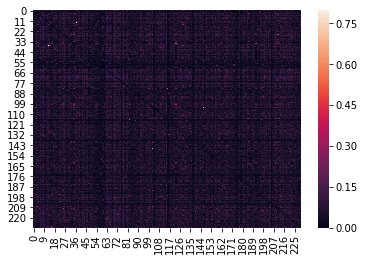

In [52]:
sns.heatmap(d)
plt.show()

# LSA / word-2-vec - Compare verse, tags, and titles with LSA

In [53]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,module="pandas", lineno=570)

In [54]:
docs = df_verses_tagged['verse2']
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(docs)
pd.DataFrame(dtm.toarray(),index=docs,columns=vectorizer.get_feature_names()).head(3)


,12,18,480,50,aafke,aai,aaien,aan,aandeel,aandelen,...,zweet,zwembad,zwembroek,zwemmen,zweten,zwijgen,zwijn,écht,één,óók
verse2,,,,,,,,,,,,,,,,,,,,,
"te dik door snacken Sint zag jou laatst weer snacken, hij kneep zijn ogen dicht hij dacht: het is wel lekker maar slecht voor haar (zijn) gewicht als zij (hij) met zoveel eten nog lang zo door blijft gaan dan kan zij (hij) deze zomer niet haar bikini (zijn zwembroek)aan. (met dank aan Mieke) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096593,0.0,0.0,...,0.0,0.0,0.175961,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Mooi Kado oh oh oh Wat een mooi kado allemachtig, is echt prachtig! (met dank aan Ivy) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070736,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Internet-cadeau te laat Helaas ging internet niet zo snel, maar krijgen doe je hem nog wel. Geniet maar vast van deze afbeelding, want het is echt een hebbeding. (met dank aan Winnie) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070927,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['12',
 '18',
 '480',
 '50',
 'aafke',
 'aai',
 'aaien',
 'aan',
 'aandeel',
 'aandelen',
 'aangekomen',
 'aangemerkt',
 'aangesproken',
 'aangetrokken',
 'aankoopbon',
 'aanreiken',
 'aansteken',
 'aantal',
 'aardig',
 'accenten',
 'achter',
 'achteraan',
 'achterdeel',
 'achterna',
 'achterop',
 'achterste',
 'actief',
 'actieplan',
 'af',
 'afbeelding',
 'afgekloven',
 'afgelopen',
 'afgeschoren',
 'afscheid',
 'afschrift',
 'afspraken',
 'afstand',
 'aftershave',
 'afvegen',
 'afwasflop',
 'agenda',
 'agendavulling',
 'ajax',
 'al',
 'alcohol',
 'aldaar',
 'aldoor',
 'aldus',
 'alle',
 'alleen',
 'allemaal',
 'allemachtig',
 'allen',
 'allerhande',
 'allerlei',
 'alles',
 'als',
 'alsjeblieft',
 'alternatief',
 'altijd',
 'alweer',
 'amarilis',
 'amarilus',
 'ambities',
 'analyse',
 'ander',
 'andere',
 'anderen',
 'anders',
 'anne',
 'anoniem',
 'antislip',
 'app',
 'apparaat',
 'appelkleuren',
 'appels',
 'arm',
 'arrangement',
 'as',
 'asfalt',
 'asjemenou',
 'assisteren',
 'atl

In [56]:
vectorizer2.get_feature_names()

['aai',
 'aandeel',
 'aandelen',
 'aangekomen',
 'accenten',
 'adem',
 'afbeelding',
 'afgekloven',
 'afgestudeerd',
 'afscheid',
 'afsluiting',
 'afstandsbediening',
 'aftershave',
 'afvallen',
 'afwas',
 'afwasmachine',
 'afwassen',
 'agenda',
 'agendavulling',
 'ajax',
 'alcohol',
 'alleen',
 'allen',
 'alles',
 'altijd',
 'amarilus',
 'ambitie',
 'anderen',
 'app',
 'appels',
 'appen',
 'arm',
 'asfalt',
 'asjemenou',
 'auto',
 'autorijden',
 'avond',
 'avondje',
 'az',
 'baan',
 'baard',
 'baasje',
 'baby',
 'backpacken',
 'bal',
 'ballen',
 'bank',
 'bar',
 'bas',
 'beat',
 'bed',
 'bedreven',
 'beeld',
 'begin',
 'beginnetje',
 'beginzin',
 'behagen',
 'bejaard',
 'bekeuring',
 'bel',
 'beleggen',
 'bellen',
 'bericht',
 'beurs',
 'bewegen',
 'bh',
 'bi',
 'bibliotheek',
 'bijna',
 'bijten',
 'bikini',
 'billen',
 'binnen',
 'bioscoop',
 'bioscoopbon',
 'bioscoopkaartje',
 'blauw',
 'blendle',
 'blij',
 'bloed',
 'bloeien',
 'bloem',
 'bloembol',
 'bloemen',
 'bloemstuk',
 'blon

In [57]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(10, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [58]:
pd.DataFrame(lsa.components_,columns = vectorizer.get_feature_names())

,12,18,480,50,aafke,aai,aaien,aan,aandeel,aandelen,...,zweet,zwembad,zwembroek,zwemmen,zweten,zwijgen,zwijn,écht,één,óók
0,0.003194,0.003513,0.003396,0.002938,0.003593,0.003847,0.003176,0.149043,0.003207,0.003207,...,0.002181,0.001866,0.002999,0.002424,0.003397,0.008252,0.003253,0.003339,0.004184,0.003125
1,0.010170,-0.001379,0.010577,-0.001370,0.000266,-0.003816,-0.003179,0.042167,-0.002534,-0.002534,...,-0.001690,-0.000217,-0.002319,0.000628,-0.003275,-0.008977,-0.004535,-0.004091,-0.004647,0.002155
2,0.002410,-0.001635,-0.000328,-0.003477,-0.013487,-0.004972,-0.006634,-0.082476,0.005030,0.005030,...,0.001945,0.000840,-0.015345,0.001091,0.020593,-0.003906,-0.001627,-0.007493,-0.002491,-0.005304
3,-0.001754,0.005253,-0.003669,0.001705,-0.011365,-0.026759,-0.001359,0.018255,0.001991,0.001991,...,-0.002332,-0.000131,-0.001240,-0.001822,0.002752,-0.012233,-0.002688,-0.002395,-0.008931,-0.012601
4,0.001518,-0.005564,-0.007772,0.010023,0.001025,-0.004034,0.007923,-0.018479,0.003597,0.003597,...,-0.009930,0.000698,0.000735,-0.002863,0.008246,0.000914,0.000981,-0.003586,-0.015732,-0.001636
5,-0.003704,0.000562,-0.013017,-0.002274,-0.012955,-0.013078,0.003320,0.011297,-0.002980,-0.002980,...,-0.006049,0.003077,0.009405,0.003447,-0.015876,-0.022530,0.020265,-0.003247,0.005542,-0.006506
6,-0.001866,-0.005387,0.002267,0.001048,0.002725,-0.008068,0.006434,0.093644,0.003945,0.003945,...,-0.007863,0.007884,-0.011422,0.005274,0.008133,-0.028412,-0.008631,-0.005283,-0.000786,-0.000237
7,-0.000234,-0.006300,0.009288,-0.009428,0.015251,-0.008536,-0.005189,-0.076301,0.000991,0.000991,...,-0.003558,-0.005997,-0.004286,-0.000777,0.000863,0.006051,0.019229,-0.000426,-0.002150,-0.005355
8,0.005384,-0.005836,-0.002293,-0.014047,0.015536,-0.009614,-0.009678,0.178138,-0.012775,-0.012775,...,-0.007915,-0.001839,0.028664,-0.010279,0.007710,0.017019,-0.010333,-0.007425,-0.011985,-0.005597
9,0.001402,-0.000298,0.003592,-0.000297,-0.000536,-0.002749,0.002424,-0.197192,0.002415,0.002415,...,0.013107,0.001208,0.007473,0.007208,0.005204,-0.004141,-0.003277,0.001314,0.016792,0.011127


In [59]:
pd.DataFrame(dtm_lsa, index = docs)

,0,1,2,3,4,5,6,7,8,9
verse2,,,,,,,,,,
"te dik door snacken Sint zag jou laatst weer snacken, hij kneep zijn ogen dicht hij dacht: het is wel lekker maar slecht voor haar (zijn) gewicht als zij (hij) met zoveel eten nog lang zo door blijft gaan dan kan zij (hij) deze zomer niet haar bikini (zijn zwembroek)aan. (met dank aan Mieke) \n",0.484451,-0.100529,-0.480580,-0.030815,0.017271,0.216130,-0.252366,-0.093826,0.617304,0.150760
"Mooi Kado oh oh oh Wat een mooi kado allemachtig, is echt prachtig! (met dank aan Ivy) \n",0.394475,0.130868,-0.214244,0.010753,0.735153,-0.002441,-0.024013,-0.321647,-0.145454,-0.340001
"Internet-cadeau te laat Helaas ging internet niet zo snel, maar krijgen doe je hem nog wel. Geniet maar vast van deze afbeelding, want het is echt een hebbeding. (met dank aan Winnie) \n",0.806661,-0.177559,0.120875,-0.420331,0.109626,0.060452,-0.183107,-0.173404,0.172568,-0.132032
"Opknapbeurt Soms kijk ik in de spiegel en wordt dan helemaal kriegel dan zie ik mijn kin, ongeschoren en komt mijn baard echt uit mijn oren er vliegen dode vogels in mijn mond en alles wat ik zie is een mopperkont Nee, dat zijn toch van die dagen die mij niet kunnen behagen. maar jongeman, wees niet getreurd het is gewoon tijd voor een opknapbeurt.\n",0.554433,0.543346,-0.171112,0.153269,-0.228578,-0.357470,-0.206373,-0.148838,-0.315201,-0.021948
Hulp voor de kerstman Sint vindt als sportieve vent de kerstman echt geen concurrent al dragen zij iets andere kleren Hij wil hem best wel assisteren. daarom geeft hij als Spaanse heer nu kerstversiering voor de sfeer\n,0.529461,-0.299620,-0.307913,0.020399,0.308631,0.175545,-0.297873,0.213530,0.232661,0.469200
bloem en kus in de regen Jou ogen stralen van geluk Jij geeft mij een prachtig bloemstuk Onder de stralen van de regen Word ik door jou kus verlegen (met dank aan Giittaaa) \n,0.539787,0.265595,-0.245406,0.245636,-0.264799,0.339809,0.550788,0.017147,-0.165997,-0.026884
"Toneel Sinterklaas wilde naar een voorstelling kijken, om jou met een hoofdrolspeler(speelster) te vergelijken want hij weet hoezeer jij van toneelspelen houdt dat doe je het liefst, ook al word je heel oud op het toneel voel jij je thuis ook al zit je in het bejaardentehuis (met dank aan een musical fan) \n",0.847974,-0.203721,0.341742,-0.095463,-0.109177,0.139317,0.272087,-0.039683,-0.005079,-0.081097
"Opgegeten letter Een letter van chocola is wat je wou, maar Sint had niet verwacht dat dit gebeuren zou: Smulpiet had van honger niet stilgezeten, en heeft zo jouw letter opgegeten! (met dank aan Logan Danes) \n",0.792471,-0.067754,-0.067114,-0.480654,0.175141,-0.053669,0.181145,0.055485,0.144595,-0.203746
Plaid Je wilde iets om het wat warmer te krijgen en de temperatuur van je lichaam te laten stijgen zodat je het niet meer koud hebt en de kou van je lijf weg ebt. (met dank aan Petra) \n,0.750754,-0.162882,0.365079,0.019508,-0.203635,0.013968,0.216769,0.345237,0.096355,-0.243003


In [60]:
    df_topicized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),
        'verse':df_verses_tagged['verse'].tolist(), 
        'tags':df_verses_tagged['tags'].tolist(),
        'component_1': dtm_lsa.T[0], 
        'component_2': dtm_lsa.T[1]}, index=df_verses_tagged['verse_id'])

In [61]:
df_topicized.head(3)

,component_1,component_2,tags,title,verse,verse_id
verse_id,,,,,,
001,0.484451,-0.100529,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z...",001
002,0.394475,0.130868,"Cadeau,prachtig,Kado,mooi,machtig",Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec...",002
011,0.806661,-0.177559,"afbeelding,laat,hebbeding,internet,snel,cadeau...",Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge...",011


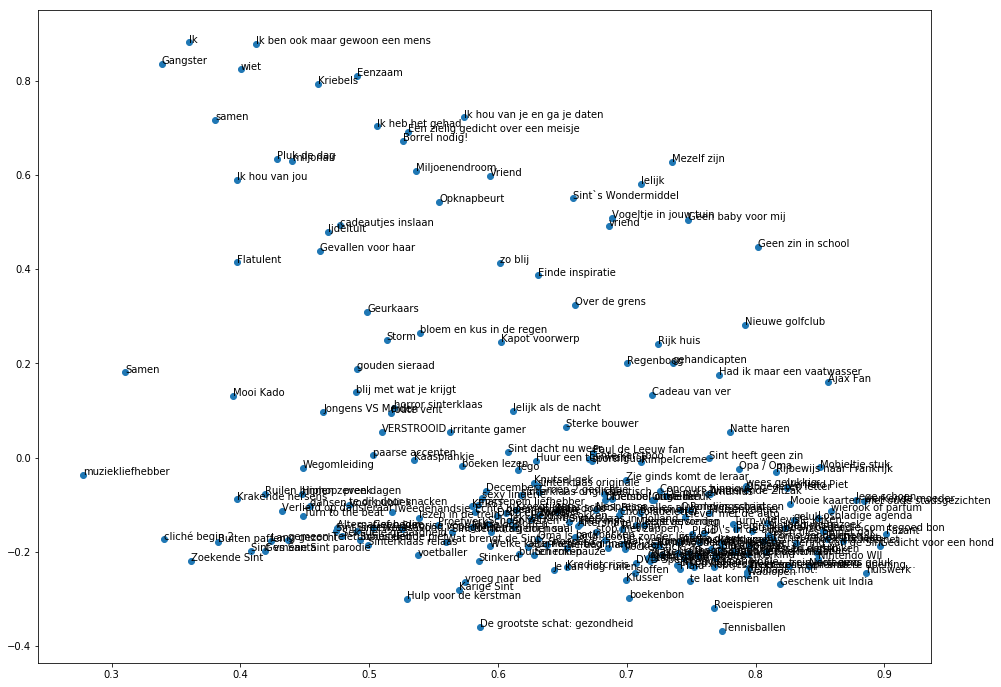

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.scatter(df_topicized['component_1'],df_topicized['component_2'])

for i, txt in enumerate(df_topicized['title']):
    plt.annotate(txt, (df_topicized['component_1'].iloc[i],df_topicized['component_2'].iloc[i]))

plt.show()

In [63]:
# do same for tags:
tags = df_verses_tagged['tags']
vectorizer3 = TfidfVectorizer()
tags_tm = vectorizer3.fit_transform(tags)

lsa3 = TruncatedSVD(10, algorithm = 'arpack')
tags_tm_lsa = lsa3.fit_transform(tags_tm.asfptype())
tags_tm_lsa = Normalizer(copy=False).fit_transform(tags_tm_lsa)
df_tags_topicized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),     
        'tags':df_verses_tagged['tags'].tolist(), 
        'component_1': tags_tm_lsa.T[0], 
        'component_2': tags_tm_lsa.T[1]}, index=df_verses_tagged['verse_id'])
df_tags_topicized.head(3)

,component_1,component_2,tags,title,verse_id
verse_id,,,,,
001,0.050817,0.035476,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",te dik door snacken,001
002,0.335867,0.193532,"Cadeau,prachtig,Kado,mooi,machtig",Mooi Kado,002
011,0.317624,0.036049,"afbeelding,laat,hebbeding,internet,snel,cadeau...",Internet-cadeau te laat,011


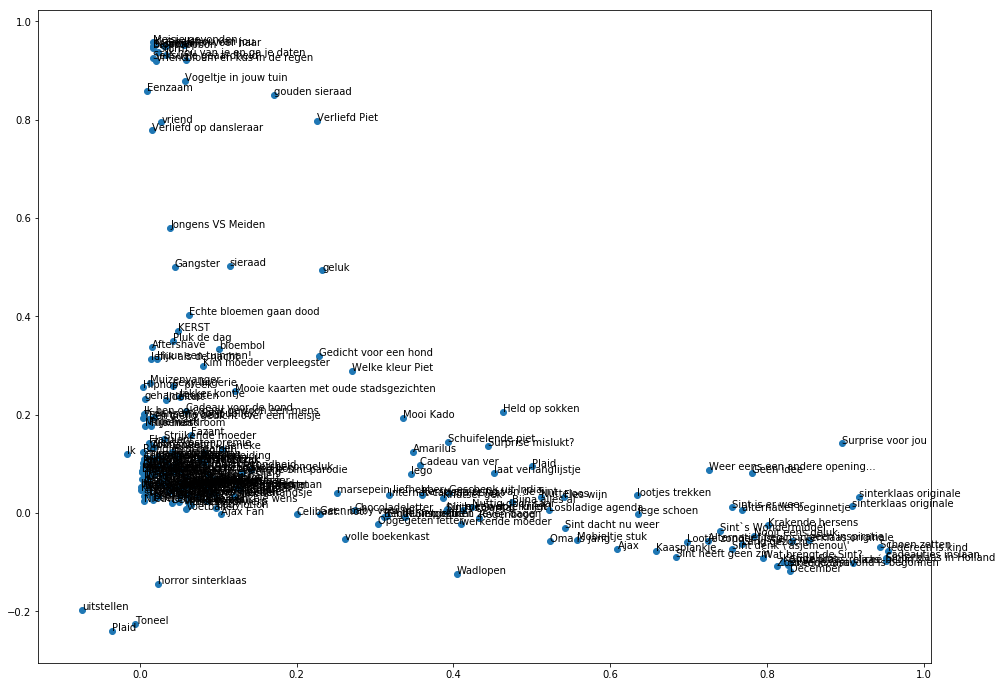

In [64]:
plt.figure(figsize=(16,12))
plt.scatter(df_tags_topicized['component_1'],df_tags_topicized['component_2'])

for i, txt in enumerate(df_tags_topicized['title']):
    plt.annotate(txt, (df_tags_topicized['component_1'].iloc[i],df_tags_topicized['component_2'].iloc[i]))

plt.show()

In [65]:
# merge results into one df
df_categorized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),     
        'tags':df_verses_tagged['tags'].tolist(), 
        'verse':df_verses_tagged['verse'].tolist(),
        'verse_c1': dtm_lsa.T[0], 
        'verse_c2': dtm_lsa.T[1],
        'tags_c1': tags_tm_lsa.T[0], 
        'tags_c2': tags_tm_lsa.T[1] },
        index=df_verses_tagged['verse_id'])
df_categorized.head(3)

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
001,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",0.050817,0.035476,te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z...",0.484451,-0.100529,001
002,"Cadeau,prachtig,Kado,mooi,machtig",0.335867,0.193532,Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec...",0.394475,0.130868,002
011,"afbeelding,laat,hebbeding,internet,snel,cadeau...",0.317624,0.036049,Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge...",0.806661,-0.177559,011


In [66]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
sims = pd.DataFrame(similarity,index=df_topicized['verse_id'], columns=df_topicized['verse_id']).head(10)

### Make plots for some manual topic selections (tag based)

In [67]:
df_categorized[df_topicized['tags'].str.contains('sport')]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
05,"slank,dun,strak,sport,bewegen,sportief,lijf,bu...",0.045784,0.115351,sportfiguur,Heel actief ben jij sinds kort bezeten van een...,0.672664,-0.008103,05
11,"club,sport,vrouw,voetbal,zondag",0.059283,0.007574,voetballer,Als voetballers nog niet bestonden had jij ze ...,0.537933,-0.207897,11
31,"drop,zweet,sport,snoep",0.040553,0.021037,Drop en zweet,Drop is vooral meer zout dan zoet en zout is e...,0.599366,-0.124615,31
712,"roei,sterk,gast,gewichtsheffen,ambitie,gewicht...",0.017642,0.032673,Roeispieren,"De Sint dacht dat jij helemaal ontspoorde, toe...",0.768113,-0.318577,712
771,"verliezen,ballen,sport,bal,winnen,tennisbal,we...",0.095881,0.069800,Tennisballen,"Ook al is tennis jouw favoriete sport, op de b...",0.773939,-0.368358,771
951,"ajax,johan cruijf,politiek,az,fan,voetballen,v...",0.103961,-0.002883,Ajax Fan,"In ..... vinden we een pure Ajax fan, de liefd...",0.856053,0.160438,951


In [68]:
def get_booldf_filter(df_withtags, tag1, tag2):
    return (df_withtags['tags'].str.contains(tag1)) | (df_withtags['tags'].str.contains(tag2))

def get_selection(df_withtags, tag1, tag2):
    return df_withtags[get_booldf_filter(df_withtags, tag1,tag2)]

def plot_selection(tag1, tag2):
    df = get_selection(df_categorized, tag1,tag2)
    
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,10))
    ax1.scatter(df['verse_c1'],df['verse_c2'])
    ax1.set_title('Verses - LSA first 2 components')
    ax2.scatter(df['tags_c1'],df['tags_c2'])
    ax2.set_title('Tags - LSA first 2 components')

    for i, txt in enumerate(df['title']):
        ax1.annotate(txt, (df['verse_c1'].iloc[i],df['verse_c2'].iloc[i]))
        ax2.annotate(txt, (df['tags_c1'].iloc[i],df['tags_c2'].iloc[i]))
        
    plt.show()

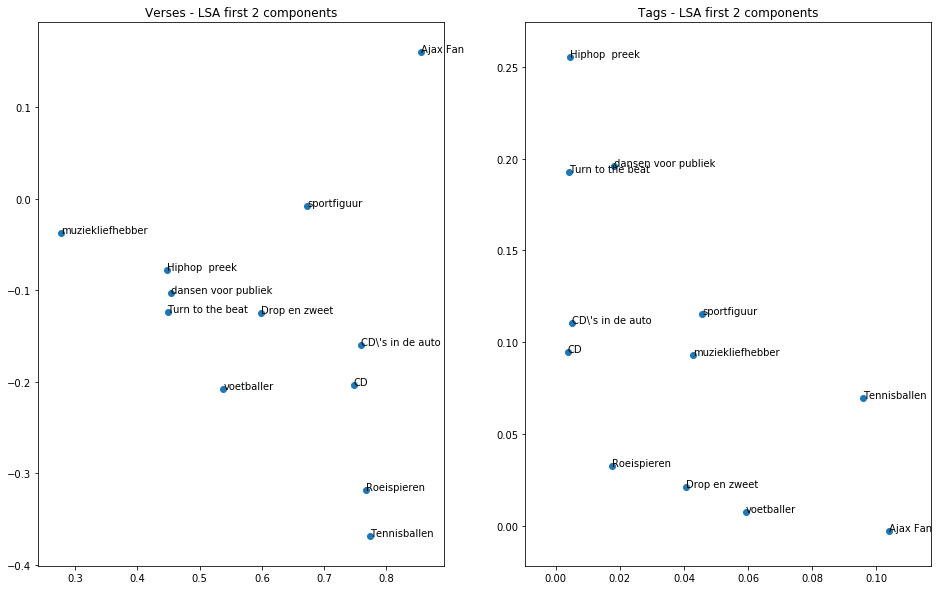

In [69]:
plot_selection('sport','muziek')

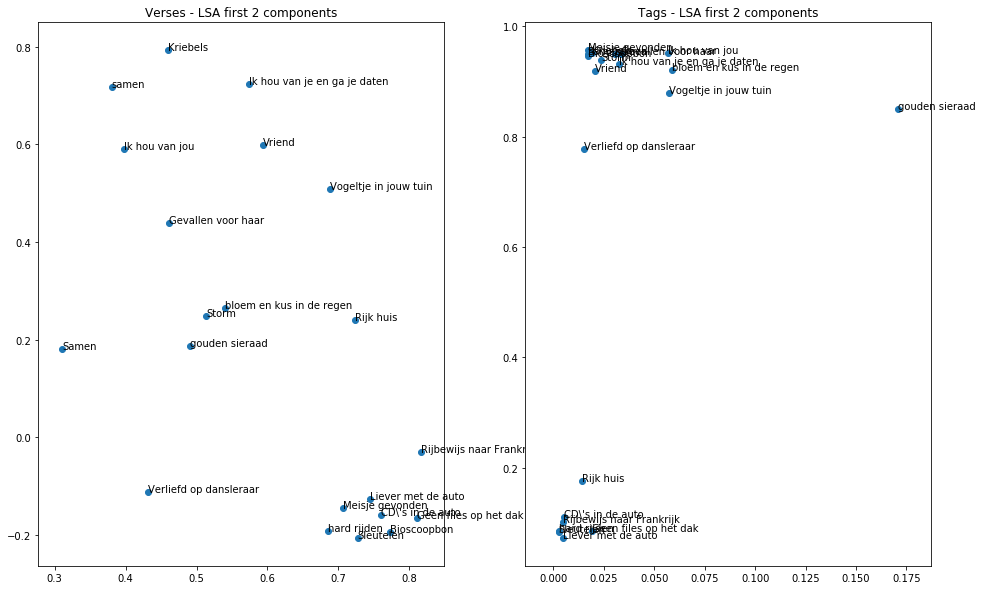

In [70]:
plot_selection('liefde','auto')

# Similarities 

In [71]:
# Compute document similarity using LSA components
sim_verse = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
sim_tags = np.asarray(np.asmatrix(tags_tm_lsa) * np.asmatrix(tags_tm_lsa).T)

df_sim_verse = pd.DataFrame(sim_verse,index=df_categorized['verse_id'], columns=df_categorized['verse_id'])
df_sim_tags = pd.DataFrame(sim_tags,index=df_categorized['verse_id'], columns=df_categorized['verse_id'])

In [72]:
df_filter = (df_categorized['tags'].str.contains('sport')) | (df_categorized['tags'].str.contains('muziek'))
df_sim_verse_sportmuziek = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]

In [73]:
# extend with titles
df_sim_verse_sportmuziek = df_sim_verse_sportmuziek.join(df_categorized['title'])

In [74]:
titles = df_sim_verse_sportmuziek['title'].tolist() + ['title']
df_sim_verse_sportmuziek.columns = titles

In [75]:
df_sim_verse_sportmuziek

,sportfiguur,voetballer,CD,Drop en zweet,dansen voor publiek,muziekliefhebber,CD\'s in de auto,Turn to the beat,Hiphop preek,Roeispieren,Tennisballen,Ajax Fan,title
verse_id,,,,,,,,,,,,,
05,1.000000,0.427197,0.314691,0.583374,0.242682,0.747366,0.382503,0.109637,0.269043,0.668077,0.687840,0.350415,sportfiguur
11,0.427197,1.000000,0.456509,0.339880,0.474426,0.296967,0.511352,0.549748,0.274257,0.828991,0.537648,0.452743,voetballer
302,0.314691,0.456509,1.000000,0.250219,0.638743,0.171147,0.812681,0.738704,0.484870,0.520403,0.576883,0.792992,CD
31,0.583374,0.339880,0.250219,1.000000,0.139861,0.221993,0.560642,0.063683,0.226501,0.549523,0.506337,0.451866,Drop en zweet
321,0.242682,0.474426,0.638743,0.139861,1.000000,0.385237,0.431361,0.930208,0.878925,0.419441,0.069896,0.316301,dansen voor publiek
332,0.747366,0.296967,0.171147,0.221993,0.385237,1.000000,-0.040483,0.203913,0.306491,0.291794,0.276885,0.035145,muziekliefhebber
41,0.382503,0.511352,0.812681,0.560642,0.431361,-0.040483,1.000000,0.561767,0.336190,0.701686,0.678852,0.763012,CD\'s in de auto
421,0.109637,0.549748,0.738704,0.063683,0.930208,0.203913,0.561767,1.000000,0.678684,0.440403,0.155029,0.397801,Turn to the beat
521,0.269043,0.274257,0.484870,0.226501,0.878925,0.306491,0.336190,0.678684,1.000000,0.355054,-0.009699,0.276184,Hiphop preek


In [76]:
df_filter = (df_categorized['tags'].str.contains('liefde'))
df_sim_verse_liefde = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]
df_sim_verse_liefde = df_sim_verse_liefde.join(df_categorized['title'])
df_sim_verse_liefde

,021,08,121,361,432,51,512,61,611,68,741,811,841,911,title
verse_id,,,,,,,,,,,,,,,
021,1.000000,0.435439,0.605372,0.593659,0.580497,0.591966,0.625731,0.083305,0.561943,0.720094,0.482389,0.047988,0.730481,0.803501,bloem en kus in de regen
08,0.435439,1.000000,0.465749,0.567070,0.616307,0.497851,0.316093,-0.058360,0.739686,0.169922,0.636057,0.652445,0.595063,0.321369,Gevallen voor haar
121,0.605372,0.465749,1.000000,0.826203,0.836401,0.388042,0.328077,0.360218,0.709679,0.627840,0.811014,0.078087,0.530848,0.822597,Ik hou van je en ga je daten
361,0.593659,0.567070,0.826203,1.000000,0.860581,0.753982,0.046898,0.096869,0.520365,0.470342,0.674426,0.196017,0.807737,0.686504,samen
432,0.580497,0.616307,0.836401,0.860581,1.000000,0.567944,0.170098,0.328505,0.615880,0.509991,0.838704,0.302789,0.709456,0.653837,Vriend
51,0.591966,0.497851,0.388042,0.753982,0.567944,1.000000,0.117689,0.002052,0.159030,0.398602,0.211353,0.450855,0.948568,0.360924,Samen
512,0.625731,0.316093,0.328077,0.046898,0.170098,0.117689,1.000000,0.391168,0.584575,0.522248,0.174988,0.241956,0.299385,0.417278,Bioscoopbon
61,0.083305,-0.058360,0.360218,0.096869,0.328505,0.002052,0.391168,1.000000,0.244800,0.084952,0.188879,0.068506,0.063494,-0.021032,Meisje gevonden
611,0.561943,0.739686,0.709679,0.520365,0.615880,0.159030,0.584575,0.244800,1.000000,0.325157,0.725089,0.203685,0.371610,0.583810,Vogeltje in jouw tuin


In [77]:
def show_verse(verse_id, sameline=True):
    title = df_categorized.loc[[verse_id]][['title']].iloc[0][0]
    verse = df_categorized.loc[[verse_id]][['verse']].iloc[0][0]
    if sameline:
        print(title,": ", verse[:80], "...")
    else:
        print(title)
        print(verse)
        
def show_title(verse_id):
    title = df_categorized.loc[[verse_id]][['title']].iloc[0][0]
    print(title)

In [78]:
show_verse('811')

Verliefd op dansleraar :  Dansen doet zij(hij) erg graag, met heel haar hart en ziel. En ze ging het nog l ...


In [79]:
show_verse('021')

bloem en kus in de regen :  Jou ogen stralen van geluk Jij geeft mij een prachtig bloemstuk Onder de stralen ...


In [80]:
show_verse('361')

samen :  wij twee samen twee lichamen jij en ik ik je chick jij mijn held ik smelt jij en ...


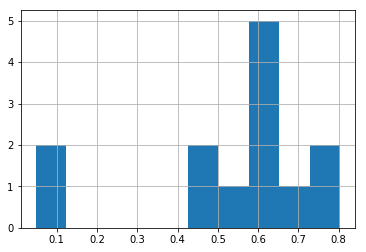

In [81]:
avg_021_liefde = df_sim_verse_liefde[(df_sim_verse_liefde.index!='021')]['021']
avg_021_liefde.hist()

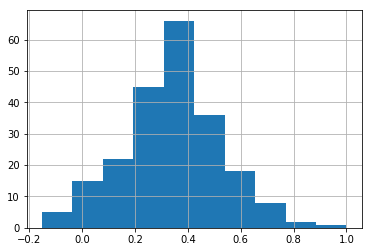

In [82]:
avg_021_all = df_sim_verse[(~df_sim_verse.index.isin(avg_021_liefde.index))]['021']
avg_021_all.hist()

In [83]:
df_filter = (df_categorized['tags'].str.contains('auto'))
df_sim_verse_auto = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]
df_sim_verse_auto = df_sim_verse_auto.join(df_categorized['title'])
df_sim_verse_auto

,042,09,41,55,65,73,85,title
verse_id,,,,,,,,
042,1.000000,0.641610,0.776662,0.671840,0.699975,0.641302,0.624542,Rijbewijs naar Frankrijk
09,0.641610,1.000000,0.593061,0.633312,0.462711,0.565339,0.513814,Sleutelen
41,0.776662,0.593061,1.000000,0.911696,0.681258,0.428602,0.807446,CD\'s in de auto
55,0.671840,0.633312,0.911696,1.000000,0.809385,0.525897,0.740782,Geen files op het dak
65,0.699975,0.462711,0.681258,0.809385,1.000000,0.479837,0.487025,Rijk huis
73,0.641302,0.565339,0.428602,0.525897,0.479837,1.000000,0.666186,hard rijden
85,0.624542,0.513814,0.807446,0.740782,0.487025,0.666186,1.000000,Liever met de auto


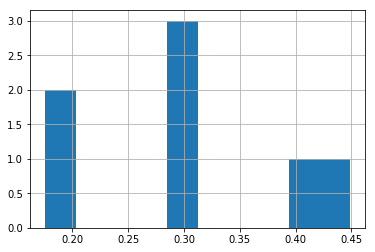

In [84]:
avg_021_auto = df_sim_verse[(df_sim_verse.index.isin(df_sim_verse_auto.index))]['021']
avg_021_auto.hist()

In [85]:
df_sim_verse['081'].sort_values(ascending=False).head(10).tolist()

[0.9999999999999998,
 0.9564878254400637,
 0.9195270574310868,
 0.8565507326246324,
 0.8467242108435181,
 0.8446128837461985,
 0.8277077168178529,
 0.8254271483672289,
 0.8227333724580687,
 0.8218244382760334]

In [118]:
def show_title_and_score(verse_id, score):
    title = df_categorized.loc[[verse_id]][['title']].iloc[0][0]
    print(title, "({:.2f})".format(score))
    #print(title, "\t ","{:.2f}".format(score))

def show_closest(verse_id, maxnum, min_score=0.5, elaborate = False):    
    col1 = df_sim_verse[verse_id].sort_values(ascending=False).head(maxnum)
    col1 = col1[col1>min_score]
    ids1 = col1.index.tolist()
    scores1 = col1.tolist()
    col2 = df_sim_tags[verse_id].sort_values(ascending=False).head(maxnum)
    col2 = col2[col2>min_score]
    ids2 = col2.index.tolist()
    scores2 = col2.tolist()
    if (elaborate):
        show_verse(ids1[0])
        print("---------------")
        print("\n- VERSE BASED -")
        for i in range(0,len(ids1)): show_verse(ids1[i], sameline=True)
        print("\n- TAGS BASED -")
        for i in range(0,len(ids2)): show_verse(ids2[i], sameline=True)
    else:
        show_title(ids1[0])
        print("---------------")
        print("\n- VERSE BASED -")
        for i in range(0,len(ids1)): show_title_and_score(ids1[i],scores1[i])
        print("\n- TAGS BASED -")
        for i in range(0,len(ids2)): show_title_and_score(ids2[i],scores2[i])
            

In [87]:
def show_by_tag(tag1, tag2=None):
    ids = df_categorized[df_categorized['tags'].str.contains(tag1)]['verse_id'].tolist()
    if (tag2!=None):
        ids2 = df_categorized[df_categorized['tags'].str.contains(tag2)]['verse_id'].tolist()
        for id2 in ids2: 
            if (id2 not in ids): ids.append(id2)
    for i in range(0,len(ids)): show_title(ids[i])

In [88]:
show_closest('811', 10)

Verliefd op dansleraar
---------------

- VERSE BASED -
te dik door snacken (0.94)
Hiphop  preek (0.90)
Seksuele geaardheid (0.89)
dansen voor publiek (0.88)
Turn to the beat (0.82)
Jongens VS Meiden (0.81)
Welke kleur Piet (0.78)
Schuifelende piet (0.76)
Surprise mislukt? (0.73)

- TAGS BASED -
Seksuele geaardheid (0.86)
Kriebels (0.79)
Samen (0.77)
Meisje gevonden (0.77)
Hiphop  preek (0.77)
bloem en kus in de regen (0.73)
dansen voor publiek (0.73)
Bioscoopbon (0.72)
Turn to the beat (0.72)


In [89]:
show_by_tag('liefde')

bloem en kus in de regen
Gevallen voor haar
Ik hou van je en ga je daten
samen
Vriend
Samen
Bioscoopbon
Meisje gevonden
Vogeltje in jouw tuin
gouden sieraad
Kriebels
Verliefd op dansleraar
Storm
Ik hou van jou


In [90]:
show_by_tag('dansen')

dansen voor publiek
Turn to the beat
Hiphop  preek
Pluk de dag
Verliefd op dansleraar


In [91]:
show_closest('05',10)

sportfiguur
---------------

- VERSE BASED -
bloembol (0.93)
Natte haren (0.86)
Glaasje wijn (0.83)
zwanger (0.82)
Overlevingsstrijd (0.80)
Boerenlater (0.80)
Toneel (0.80)
boekenbon (0.79)
Kredietcrisis (0.77)

- TAGS BASED -
(Spijker)broek (0.86)
sexy lingerie (0.83)
lekker kontje (0.82)
Drop en zweet (0.80)
Opa / Oma (0.80)
te dik door snacken (0.79)
Stinkerd (0.78)
Geurkaars (0.78)
Chocoladeletter (0.78)


In [92]:
show_by_tag('sport')

sportfiguur
voetballer
Drop en zweet
Roeispieren
Tennisballen
Ajax Fan


In [93]:
df_categorized[df_categorized['tags'].str.contains('school')]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
081,"proefwerk,examen,huiswerk,vrienden,school,stud...",0.011288,0.180068,Proefwerk,Je zou wel willen dat je alles al kende want h...,0.553331,-0.143130,081
18,"waarderen,leren,school,lol",0.010623,0.069124,Naar school,Elke dag moet je naar school dat doe je echt n...,0.646089,-0.114015,18
48,"zappen,lui,zin,toekomst,stappen,school,riool",0.062345,0.056124,Geen zin in school,Spoel de school maar door’t riool veel liever ...,0.801671,0.447607,48
522,"groep,bloed,schrijven,school,7,kleuter,leren,a...",0.018560,0.077847,Groep 2 gedichtje,Je bent veel bezig met leren Zo reken je met a...,0.632073,-0.073841,522
64,"wijs,huiswerk,school,vrije tijd,leren",0.058239,0.073523,huiswerk,huiswerk lijkt soms wel een straf en het is no...,0.886030,-0.244404,64
932,"boos,lied,slecht,lezen,irritant,stoomboot,Brus...",0.037257,0.043482,Zie ginds komt de leraar,Zie ginds komt de leraar met proefwerken aan. ...,0.699057,-0.047847,932


In [94]:
show_closest('081',10)

Proefwerk
---------------

- VERSE BASED -
Meisje gevonden (0.96)
Groep 2 gedichtje (0.92)
geen enkele wens (0.86)
bodylotion (0.85)
Verhuizen (0.84)
VERSTROOID (0.83)
Golfhandschoen (0.83)
Naar school (0.82)
wierook of parfum (0.82)

- TAGS BASED -
Naar school (0.98)
huiswerk (0.95)
Groep 2 gedichtje (0.94)
Geen zin in school (0.91)
Zie ginds komt de leraar (0.90)
boekenbon (0.86)
boek halen bij de bib. (0.85)
boeken lezen (0.85)
Blendle.com tegoed bon (0.84)


In [95]:
show_by_tag('school')

Proefwerk
Naar school
Geen zin in school
Groep 2 gedichtje
huiswerk
Zie ginds komt de leraar


In [96]:
df_categorized[(df_categorized['tags'].str.contains('computer')) | (df_categorized['title'].str.contains('computer'))]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
112,"winnen,spelcomputer,irritant,spelen,looser,ver...",0.085338,0.059779,irritante gamer,altijd als wij gaan gamen moet jij controller...,0.562621,0.053254,112
13,"WII,fitness,Nintendo,gamen,afvallen,computer",0.011470,0.046725,Nintendo WII,Niet meer naar de fitnesszaal dat gebeurt tege...,0.848580,-0.214478,13
422,"pagina,krant,interesse,geld,on-line,computer,i...",0.042652,0.082867,Blendle.com tegoed bon,"Als je op de hoogte wilt blijven, dan koop je ...",0.852751,-0.156244,422


In [97]:
show_closest('112',10)

irritante gamer
---------------

- VERSE BASED -
lelijk als de nacht (0.91)
Twitterende Zitzak (0.88)
televisie kijken (0.88)
Aftershave (0.82)
backpacken (0.79)
reisboek via internet (0.79)
Geen files op het dak (0.77)
Rijk huis (0.77)
CD\'s in de auto (0.76)

- TAGS BASED -
Nintendo WII (0.93)
Sterke drank (0.89)
Borrel nodig! (0.89)
Glaasje wijn (0.84)
Fles wijn (0.83)
televisie kijken (0.81)
Ik heb het gehad (0.80)
Scherm-pauze (0.80)
backpacken (0.78)


In [98]:
show_by_tag('computer','scherm')

irritante gamer
Nintendo WII
Blendle.com tegoed bon
Scherm-pauze
Twitterende Zitzak


In [99]:
df_categorized[(df_categorized['tags'].str.contains('geld'))]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
301,"gezin,gelukkig,geld,succes,drank,blij,kort,lev...",0.046662,0.105697,wees gelukkig,Je bent een echte piekeraar toch heb je alles...,0.792985,-0.060195,301
422,"pagina,krant,interesse,geld,on-line,computer,i...",0.042652,0.082867,Blendle.com tegoed bon,"Als je op de hoogte wilt blijven, dan koop je ...",0.852751,-0.156244,422
47,"blut,Fortis,aandeel,geld,beleggen,aandelen,kre...",0.027609,0.109849,Fortis aandelen,Jammer dat jouw geld nu vort is door dat gedoe...,0.813442,-0.172451,47
532,"pech,sint,poen,cadeau,oud,sinterklaas,tijd,gul...",0.634990,-0.002274,lege schoen,Sint had geen tijd om boodschappen te doen en ...,0.878371,-0.090242,532
631,"geld,bed,koffie,lui,miljoen,personeel,rust,mil...",0.018385,0.109563,miljonair,o had ik maar een paar miljoen dan zou ik lekk...,0.440132,0.629399,631
65,"tuin,rijk,huis,auto,geld",0.014250,0.176864,Rijk huis,Als ik zo jouw huis bekijk ben je echt ontzett...,0.724092,0.240630,65
732,"waardering,politiek,zorg,verpleging,verpleegst...",0.080163,0.299971,Kim moeder verpleegster,Werken in de zorg is geen sinecure de verpleeg...,0.724985,-0.187991,732
86,"tuin,tuinman,geld,krenterig,gras,grasmaaien",0.022100,0.313670,Huur een tuinman!,Aan grasmaaien heb jij een broerje dood je vin...,0.629487,-0.006715,86


In [100]:
show_closest('24',10)

Kredietcrisis
---------------

- VERSE BASED -
Kroegtijger (0.96)
Boerenlater (0.87)
bloembol (0.85)
te laat komen (0.83)
Turn-wijf (0.83)
Cd kopieren (0.81)
Echte bloemen gaan dood (0.80)
Knutsel-gek (0.80)
Natte haren (0.79)

- TAGS BASED -
De grootste schat: gezondheid (0.98)
Fortis aandelen (0.98)
miljonair (0.97)
Ik ben ook maar gewoon een mens (0.97)
Nespresso (0.97)
Miljoenendroom (0.97)
buiten roken (0.96)
Rijk huis (0.93)
Huur een tuinman! (0.93)


In [101]:
show_by_tag('geld')

wees gelukkig
Blendle.com tegoed bon
Fortis aandelen
lege schoen
miljonair
Rijk huis
Kim moeder verpleegster
Huur een tuinman!


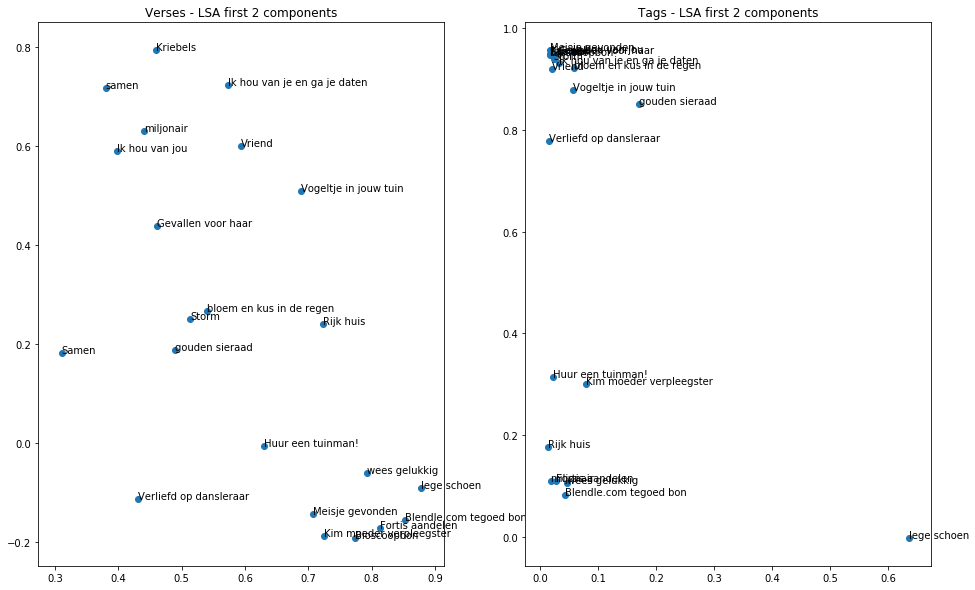

In [102]:
plot_selection('liefde','geld')

In [103]:
len(df_verses_tagged)

231

In [104]:
k = df_verses_tagged.loc[df_verses_tagged['title'].str.contains('geaardheid')]['verse'].iloc[0]

In [105]:
print(str(k))

Sommige mensen vinden haar(hem) raar, maar zo raar is zij(hij) niet. Zij(hij) is eigenlijk heel normaal, zoals je misschien ziet.  Zij(hij) is echter geen hetero en heeft daar lang over ingezeten. Ze(hij) valt namelijk [ook] op vrouwen(mannen), maar dat hoeft niet iedereen te weten.    (met dank aan M.J.) 



In [106]:
df_categorized[(df_categorized['tags'].str.contains('muziek'))]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
302,"kamer,zang,gang,CD,zingen,tempo,muziek,liedjes",0.003735,0.094535,CD,"Crescendo, Tempo, Pianissimo, Bravo! Sinterkla...",0.747969,-0.203741,302
321,"publiek,dans,muziek,maat,dansen,bewegen,voeten",0.018316,0.196065,dansen voor publiek,"Zijn(haar) voeten gaan op en neer, bewegen hee...",0.453968,-0.102922,321
332,"muziek,klassiek,pop",0.042769,0.093214,muziekliefhebber,van pop tot klassiek jij houdt echt van muziek\n,0.278029,-0.037332,332
41,"CD,rijden,auto,geluid,muziek",0.005063,0.110345,CD\'s in de auto,Ga je er met de auto op uit dan heb je behoeft...,0.759739,-0.159482,41
421,"muziek,dans,beat,dansen,bas,draaien,trilling,r...",0.004227,0.192861,Turn to the beat,"Zij draait rondjes om haar as, op de trilling ...",0.448386,-0.123318,421
521,"muziek,dansen,stom,preek,dans,ouders,hiphop",0.004379,0.255421,Hiphop preek,"Hij laat zijn voeten voor zich spreken, En neg...",0.447861,-0.077536,521


In [117]:
show_closest('332',10)

muziekliefhebber
---------------

- VERSE BASED -
muziekliefhebber 	  1.00
Fles wijn 	  0.78
zwanger 	  0.76
sportfiguur 	  0.75
Kaasplankje 	  0.74
gouden sieraad 	  0.73
Echte bloemen gaan dood 	  0.73
December 	  0.71
volle boekenkast 	  0.71
Boerenlater 	  0.69

- TAGS BASED -
muziekliefhebber 	  1.00
dansen voor publiek 	  0.99
Turn to the beat 	  0.99
CD 	  0.98
Hiphop  preek 	  0.98
CD\'s in de auto 	  0.90
Rondjes schaatsen 	  0.84
Pluk de dag 	  0.76
foute vent 	  0.67
Verliefd op dansleraar 	  0.64


In [108]:
show_by_tag('muziek')

CD
dansen voor publiek
muziekliefhebber
CD\'s in de auto
Turn to the beat
Hiphop  preek


In [109]:
df_categorized[(df_categorized['tags'].str.contains('auto'))]

,tags,tags_c1,tags_c2,title,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,
042,"handbereik,rijbewijs,chauffeur,rijden,kaartje,...",0.004559,0.102574,Rijbewijs naar Frankrijk,Jullie hebben een huis in Frankrijk Zou leuk z...,0.815924,-0.030315,042
09,"sleutelen,sleutelaar,pielen,oldtimer,wielen,kl...",0.002693,0.083815,Sleutelen,Je bent een echte sleutelaar na jaren is hij n...,0.727372,-0.206701,09
41,"CD,rijden,auto,geluid,muziek",0.005063,0.110345,CD\'s in de auto,Ga je er met de auto op uit dan heb je behoeft...,0.759739,-0.159482,41
55,"paard,file,dak,stumper,bumper,auto",0.019046,0.085361,Geen files op het dak,eigenlijk ben je maar een stumper want elke oc...,0.810183,-0.164581,55
65,"tuin,rijk,huis,auto,geld",0.014250,0.176864,Rijk huis,Als ik zo jouw huis bekijk ben je echt ontzett...,0.724092,0.240630,65
73,"incasso,auto,flitser,hardrijden,bekeuring,boete",0.002760,0.085455,hard rijden,Jij geeft heel wat geld cadeau aan het justici...,0.685668,-0.192214,73
85,"auto,comfort,spoor,file,trein,radio",0.004879,0.072620,Liever met de auto,reizen met de trein is toch niet zo fijn lieve...,0.744930,-0.126628,85


In [110]:
show_closest('73',10)

hard rijden
---------------

- VERSE BASED -
Cd kopieren (0.95)
Ouwe meuk (0.87)
boek halen bij de bib. (0.85)
Fazant (0.85)
Muizenvanger (0.83)
Cadeau voor de hond (0.83)
treinvertaging (0.81)
Mooie kaarten met oude stadsgezichten (0.81)
Knutsel-gek (0.81)

- TAGS BASED -
Sleutelen (1.00)
Klusser (1.00)
Geen files op het dak (0.98)
Liever met de auto (0.92)
Sterke bouwer (0.90)
Rijbewijs naar Frankrijk (0.88)
Rijk huis (0.88)
Fortis aandelen (0.80)
CD\'s in de auto (0.80)


In [111]:
show_by_tag('auto')

Rijbewijs naar Frankrijk
Sleutelen
CD\'s in de auto
Geen files op het dak
Rijk huis
hard rijden
Liever met de auto
